## Autores: Hector Rojas - Pablo Veloz

__Estilo Css__

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
td, th {
    text-align:left !important
    }
    
table, th, td {
  border: 1px solid black !important;
}    
</style>

""")

## Prueba 2: Analizado los crímenes en la Ciudad de Nueva York
En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es llamado `stop_and_frisk_data` y contiene información sobre interrogaciones y detenciones realizadas por le departamento de policia de NY en la vía pública. El diccionario de atributos se encuentra en el archivo 2009 `SQF File Spec.xlsx`.<br>
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del
de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumén de datos reales.
- Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivosauxiliares y csv).
- Una vez terminada la prueba, comprime la carpeta y sube el .zip a la sección correspondiente.

## __Objetivos__
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
1. Dado la  gran  cantidad de  atributos, se  le  entrega un  script `preproc_nyc_sqf.py`  que normaliza la cantidad de atributos. Haga uso de la función `create_suitable_dataframe` para igualar el benchmark de los atributos.
2. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos perdidos y presente su esquema de recodificación.
3. Generar un modelo predictivo que condicional a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no. Para ello, guíase por los siguentes lineamientos:
    - Entrene por lo menos 1 modelo que sea capaz de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos dos métricas de desempeño.
    - Refine aquellos atributos relevantes. Encuentre por lo menos 30 atributos que explique laimportancia relativa y ordénelos por orden de importancia.
    - Finalmente, reporte la probabilidad que un individuo sea arrestado en uno de los cincobarrios, condicional al género y condicional a la raza.
4. Genere al  menos cinco  modelos predictivos  que  permitan determinar si  el  procedimiento policial concluirá en alguna acción violenta.Para ello, debe generar un nuevo atributo como vector objetivo que indique cuándo hubo violencia o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia. El detalle de los atributos que se consideran violentos se detalla acontinuación:<br>
`'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other'`
5. Seleccione los  2  mejores  modelos, serialicelos y  envíelos a  evaluación. Recuerde que  elmodelo serializado debe ser posterior al fit, para poder ejecutar predict en los nuevos datos.
6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cualno tienen acceso.

## I.- __Aspectos Preliminares__
### __Descripción del problema__
__¿Cómo determinar si un procedimiento policial concluirá en un arresto o no? ¿Se podrá determinar si un procedimiento policial concluirá en alguna acción violenta?__<br>

A partir de los datos públicos del departamento de policia New York, que contienen información respecto de interrogaciones y detenciones en la vía pública, se pretende predecir dos situaciones:
   - Hubo arresto
   - Hubo acción violenta por parte de la policia<br>

Para resolver estos problemas, que serán nuestras variables objetivos y en efecto el problema a resolver será de tipo clasificación binaria, se utilizarán datos del año 2009 como entrenamiento (train) y para validación (test) serán del 2010.<br>

De esta manera, podemos generar algunos objetivos para dar solución a la problemática, a saber:

__Objetivos Específicos__

- Obtener los Datos: Importar `2009_1perc.csv`.
    - Desde `preproc_nyc_sqf.py` importar `create_suitable_dataframe`.
- Exploración Inicial: Limpiar valores nulos y graficar Variables objetivos .
- Análisis Exploratorio: Graficar variables objetivo `arstmade` - `violence` y mostrar las características de los sospechosos y localizaciones comunes durante procedimientos policiales.
- Análisis de Procedimientos Policiales: Señalar comparaciones entre procedimientos policiales en NY.
- Modelado de Tópicos: Modelos de clasificación y métricas atingente a clasificación. (se detalla más abajo)

## II.- Aspectos Computacionales
### Módulos Requeridos:
<table align="center">
    <caption> <H1><b>Módulos Gráficos</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>Python</td>
   		<td> 3.7.3</td>
		<td style='text-align:left !important' >Lenguaje de Programación</td>
 	</tr>
	<tr>
  		<td>Jupyter Notebook</td>
   		<td>1.0.2</td>
		<td>Entorno de desarrollo interactivo basado en la web para portátiles, código y datos Jupyter. JupyterLab es flexible: configure y organice la interfaz de usuario para admitir una amplia gama de flujos de trabajo en ciencia de datos, informática científica y aprendizaje automático</td>
 	</tr>
	<tr>
  		<td>Pandas</td>
   		<td>0.24.2</td>
		<td>Es una biblioteca de código abierto con licencia BSD que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
        </td>
 	</tr>
	<tr>
  		<td>matplotlib.pyplot</td>
   		<td>3.1.0</td>
		<td>Es una biblioteca gráfica 2D de Python que produce cifras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas</td>
 	</tr>
    <tr>
  		<td>seaborn</td>
   		<td>0.9.0 </td>
		<td>Se ocupará para visualizar relaciones, si bien se basa en mathplotlib posee una alternativa más atractiva e informativa para las graficas.</td>
 	</tr>
</table>



<table align="center">
    <caption> <H1><b>Módulos Machine Learning</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>sklearn</td>
   		<td> 0.21.2</td>
		<td> Es una biblioteca para aprendizaje de máquina de software libre para el lenguaje de programación Python.1​ Incluye varios algoritmos de clasificación, regresión y análisis de grupos</td>
 	</tr>
	<tr>
  		<td>selection.train_test_split</td>
   		<td>0.21.2</td>
		<td>Dividir matrices o arreglos aleatorios en subconjuntos de entrenamiento y prueba.</td>
 	</tr>
	<tr>
  		<td>preproccesing.StandardScaler</td>
   		<td>0.21.2</td>
		<td>Estandariza las características escalando los datos a la varianza de la unidad
        </td>
 	</tr>
    <tr>
  		<td>linear_model.LogisticRegression</td>
   		<td>0.21.2</td>
        <td> Es uno de los algoritmos de aprendizaje automático más utilizados, junto a la regresión lineal. En muchos sentidos, la regresión lineal y la regresión logística son similares. Pero, la mayor diferencia es que los algoritmos de regresión lineal se usan para predecir / pronosticar valores continuos, pero la regresión logística se usa para las tareas de clasificación.

El resultado de la regresión logística es una curva sigmoidea, o curva S, donde el valor de la variable independiente determinaría la variable dependiente. En la regresión logística binaria, solo hay dos resultados posibles, como 0 y 1. Utiliza un valor umbral para facilitar la predicción. Entonces, si la probabilidad predicha es menor que el valor umbral, el resultado se toma como 0 y si es mayor que el valor, el resultado se toma como 1.     </td>
 	</tr>
       <tr>
  		<td>svm.SVC</td>
   		<td>0.21.2</td>
        <td> Es un algoritmo supervisado de aprendizaje automático que se puede usar para problemas de clasificación y regresión. En este algoritmo, graficamos cada elemento de datos como un punto en el espacio n-dimensional (donde n es el recuento del número de entidades) con el valor de cada entidad como el valor de una coordenada particular. Luego, realizamos la clasificación al encontrar el hiperplano que diferencia muy bien las dos clases.

En SVM, es beneficioso tener un hiperplano lineal entre dos clases. Para clases fácilmente separables, un hiperplano lineal óptimo hace la tarea. Sin embargo, si las clases no pueden estar separadas por un hiperplano lineal, digamos, una clase de punto de datos se extiende como un círculo y mantiene otra clase de punto de datos dentro de su círculo. Dado que tales clases no pueden estar separadas por un hiperplano lineal en el estado actual, para abordar este problema, SVM utiliza un método llamado truco del núcleo. El truco del kernel actúa como una función que toma espacio de entrada de baja dimensión y lo transforma en un espacio de dimensión superior. Es sobre todo útil en problemas de separación no lineal como el indicado anteriormente. En pocas palabras, realiza algunas transformaciones de datos complejas para descubrir la forma de separar los datos en función de las clases definidas     </td>
 	</tr> 
    <tr>
  		<td>naive_bayes.BernoulliNB</td>
   		<td>0.21.2</td>
        <td>Los ingenuos Bayes son una familia de clasificadores potentes y fáciles de entrenar, que determinan la probabilidad de un resultado, dado un conjunto de condiciones utilizando el teorema de Bayes. En otras palabras, las probabilidades condicionales se invierten para que la consulta se pueda expresar en función de cantidades medibles. El enfoque es simple y el adjetivo ingenuo se ha atribuido no porque estos algoritmos sean limitados o menos eficientes, sino por una suposición fundamental sobre los factores causales que discutiremos.

Los ingenuos Bayes son clasificadores multipropósito y es fácil encontrar su aplicación en muchos contextos diferentes. Sin embargo, el rendimiento es particularmente bueno en todas aquellas situaciones en las que la probabilidad de una clase está determinada por las probabilidades de algunos factores causales. Un buen ejemplo es el procesamiento del lenguaje natural, donde un texto puede considerarse como una instancia particular de un diccionario y las frecuencias relativas de todos los términos proporcionan suficiente información para inferir una clase perteneciente.       </td>
 	</tr> 
    <tr>
  		<td>ensemble.AdaBoostClassifier¶</td>
   		<td>0.21.2</td>
        <td>AdaBoost es un método de conjunto iterativo. El clasificador AdaBoost crea un clasificador fuerte combinando múltiples clasificadores de bajo rendimiento para que obtenga un clasificador fuerte de alta precisión. El concepto básico detrás de Adaboost es establecer los pesos de los clasificadores y entrenar la muestra de datos en cada iteración de modo que garantice las predicciones precisas de observaciones inusuales. Cualquier algoritmo de aprendizaje automático se puede utilizar como clasificador base si acepta pesos en el conjunto de entrenamiento. Adaboost debe cumplir dos condiciones:
- El clasificador debe ser entrenado de manera interactiva en varios ejemplos de entrenamiento pesado.
- En cada iteración, intenta proporcionar un ajuste excelente para estos ejemplos minimizando el error de entrenamiento.      </td>
 	</tr> 
    <tr>
  		<td>ensemble.RandomForestClassifier¶¶</td>
   		<td>0.21.2</td>
        <td>  Es uno de los algoritmos más factibles y fáciles de usar. Como sabemos, un bosque está compuesto de árboles, el mismo caso también está aquí. Los bosques aleatorios crean árboles de decisión en muestras de datos seleccionadas al azar, obtienen una predicción de cada árbol y seleccionan la mejor solución mediante la votación. Podemos usar bosque aleatorio para conocer la importancia de cada característica.
El bosque aleatorio es un algoritmo de aprendizaje automático que utiliza un método de conjunto. Se dice que el bosque aleatorio está formado por numerosos árboles de decisión y ayuda a abordar el problema del sobreajuste en los árboles de decisión. Estos árboles de decisión se construyen aleatoriamente seleccionando características aleatorias del conjunto de datos dado.</td>
 	</tr> 
    </table>
         
<table align="center">
    <caption> <H1><b>Métricas</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>Accuracy</td>
   		<td>0.21.2</td>
		<td>Estimativo de casos predichos correctamente entre el total de casos.</td>
 	</tr>
	<tr>
  		<td>Precision</td>
   		<td>0.21.2</td>
		<td>Estimativo entre las predicciones correctas y casos positivos.</td>
 	</tr>
	<tr>
  		<td>Recall</td>
   		<td>0.21.2</td>
		<td>Estimativo entre los verdaderos positivos predichos por el modelo.
        </td>
 	</tr>
	<tr>
  		<td>F1</td>
   		<td>0.21.2</td>
		<td>Estimativo de la media entre Precision y Recall</td>
 	</tr>
    <tr>
  		<td>confusion_matrix</td>
   		<td>0.21.2 </td>
		<td>Una matriz de confusión es un resumen de los resultados de predicción sobre un problema de clasificación.
El número de predicciones correctas e incorrectas se resume con valores de conteo y se desglosa por clase.</td>
 	</tr>
    <tr>
  		<td>roc_curve</td>
   		<td>0.21.2</td>
		<td> evalúa la relación entre ambos errores (falsos positivos y falso negativo) condicional en todo el rango del clasificador</td>
 	</tr>
   

In [2]:
import aux_funciones as auxiliares
import seaborn as sns
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline
import helpers
import preproc_nyc_sqf

### III.- Análisis Exploratorio

### __Importando Datasets Train y Test__

In [3]:
df_train= pd.read_csv('./Archivos para Prueba 2/2009_1perc.csv')
df_test= pd.read_csv('./Archivos para Prueba 2/2010_1perc.csv')
df=pd.read_csv('./Archivos para Prueba 2/2009_1perc.csv')

In [4]:
df_train=df_train.drop("Unnamed: 0",axis=1)
df_train.shape

(5812, 111)

In [5]:
df_test=df_test.drop("Unnamed: 0",axis=1)
df_test.shape

(6013, 111)

__Se observa diferencia en la cantidad de columnas `df_train` y `df_test` , por lo tanto, hay que igualar, antes se aplicará la función  `create_suitable_dataframe`__

In [6]:
df2_train,cat_columns_train,num_columns_train= preproc_nyc_sqf.create_suitable_dataframe(df_train)


['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'perobs']


In [7]:
df2_test,cat_columns_test,num_columns_test= preproc_nyc_sqf.create_suitable_dataframe(df_test)

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perobs', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight']


In [8]:
df2_train.shape

(4636, 74)

In [9]:
df2_test.shape

(4747, 77)

### - Esta diferencia de shape, sugiere la búsqueda de columnas que no están incluidas en el año 2010. Como también, la incorporación de nuevas columnas respecto al año anterior. Revisando:

In [10]:
a_train=[x for x in df2_train.columns if x not in df2_test.columns]
print(a_train)

['asltweap', 'post']


### - Eliminando `['asltweap', 'post']` ya que son columnas que NO están presentes en el año 2010.

In [11]:
df2_train=df2_train.drop(a_train,axis=1)
df2_train.shape

(4636, 72)

In [12]:
a_test=[x for x in df2_test.columns if x not in df2_train.columns]
print(a_test)

['addrtyp', 'addrpct', 'dettypcm', 'linecm', 'detailcm']


### - Analogamente, eliminando `['addrtyp', 'addrpct', 'dettypcm', 'linecm', 'detailcm']` ya que son columnas que NO están presentes en el año 2010.

In [13]:
df2_test=df2_test.drop(a_test,axis=1)
df2_test.shape

(4747, 72)

### Verificando columnas similares
- Retorno vacío significa que tienen las mismas columnas tanto df_train como df_test

In [14]:
a_train=[x for x in df2_train.columns if x not in df2_test.columns]
print(a_train)

[]


## Inspeccionando Variables objetivo: __Arstmade__

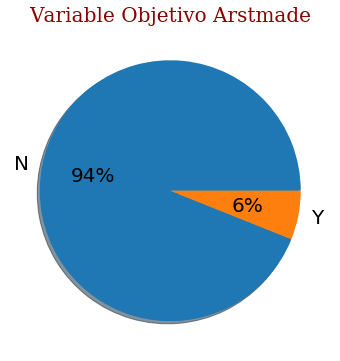

In [15]:
def circ_arstmade():
    font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 15}
    plot_size = plt.rcParams["figure.figsize"] 
    plot_size[0] = 8
    plot_size[1] = 6
    plt.rcParams["figure.figsize"] = plot_size 
    ax=df2_train.arstmade.value_counts().plot(kind='pie', autopct='%1.0f%%',shadow=True,fontsize=20)
    plt.title('Variable Objetivo {}'.format("Arstmade"),fontdict=font,fontsize=20)
    #ax.set_xlabel('')
    ax.set_ylabel('')
circ_arstmade()

__Claramente, existe desbalance de clases en `arstmade`__

In [16]:
def bar_counts_cat(dataframe,lista,dim,tam,target):
    plt.figure(figsize=(tam[0],tam[1]))
    for n, i in enumerate(lista):
        plt.subplot(dim[0], dim[1], n + 1)
        if dataframe[i].dtype!='float64':
            sns.countplot(x=i, hue=target, data=dataframe)
        else:
            sns.distplot(dataframe[i][dataframe[target]=='N'],kde_kws={"label": "N"})
            sns.distplot(dataframe[i][dataframe[target]=='Y'],kde_kws={"label": "Y"})
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
        #set_ylabel('')
        #set_xlabel('')
        #tick_params(axis='x', rotation=70)

## Arrestos según:
__Obs: Si bien existen más de 70 columnas para relacionar con la variable target`arstmade`, solo se considerarán, las que sean las principales características físicas y de ubicación registrados en cada uno de los procedimientos policiales__
### - __Características Físicas del sospechoso__

In [17]:
lista_sospec=['sex','race','meters','haircolr','eyecolor','build']

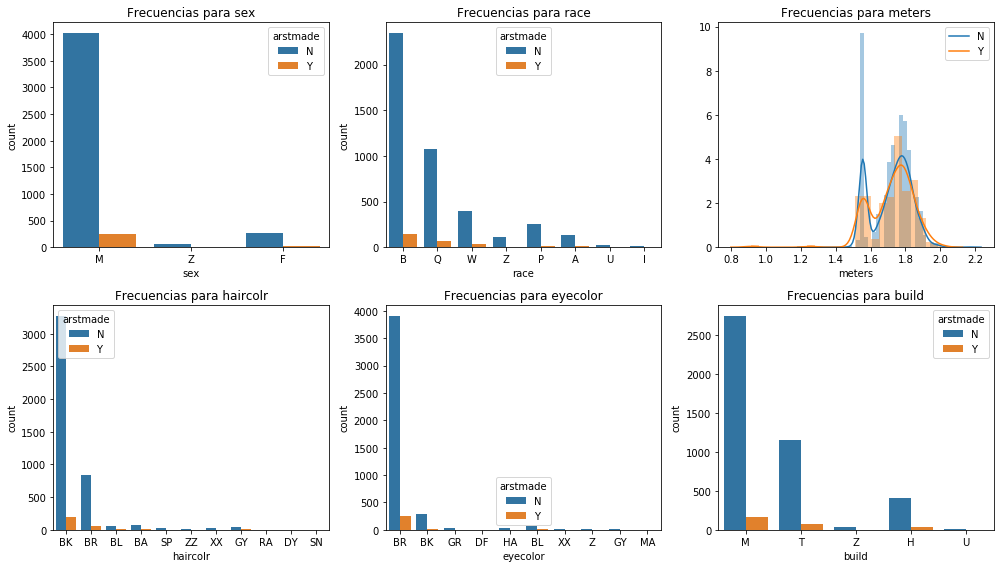

In [18]:
bar_counts_cat(df2_train,lista_sospec,(2,3),(14,8),"arstmade")

### __Producto del desbalance de clases, no se observa claramente el proposito de este estudio, que radica en la obtención de arrestros. Por tanto, se realizará un subset que contenga solo los arrestros__ 

In [19]:
df_arrestos=df2_train[df2_train['arstmade']=='Y']
lista_sospec=['sex','race','meters','haircolr','eyecolor','build']


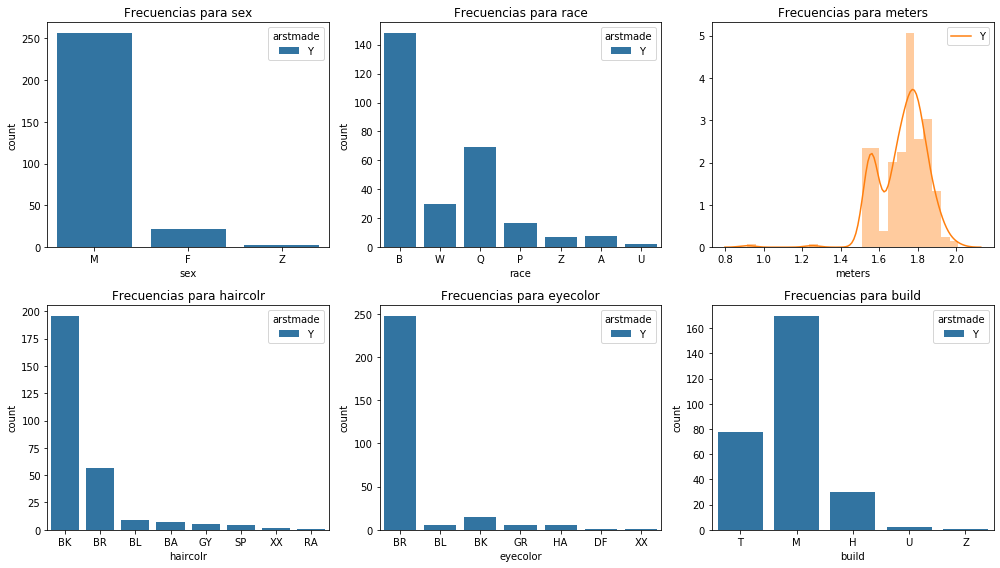

In [20]:
bar_counts_cat(df_arrestos,lista_sospec,(2,3),(14,8),"arstmade")

### Aplicando el mismo criterio anterior
## - __Características de Ciudad y Sector__

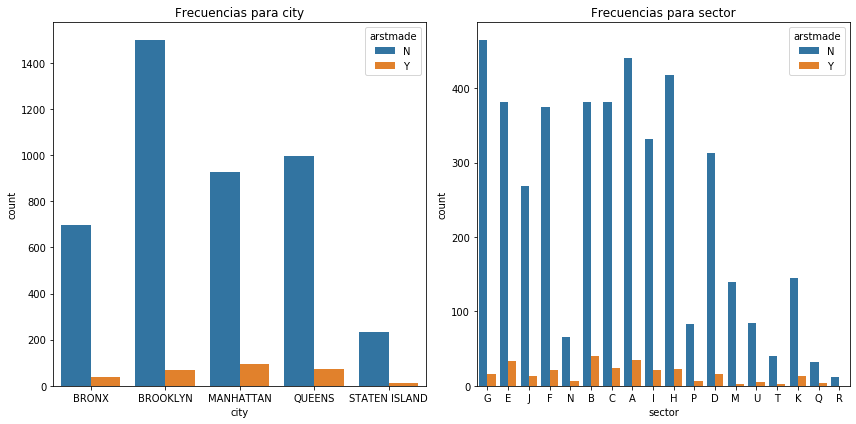

In [21]:
bar_counts_cat(df2_train,["city","sector"],(1,2),(12,6),"arstmade")

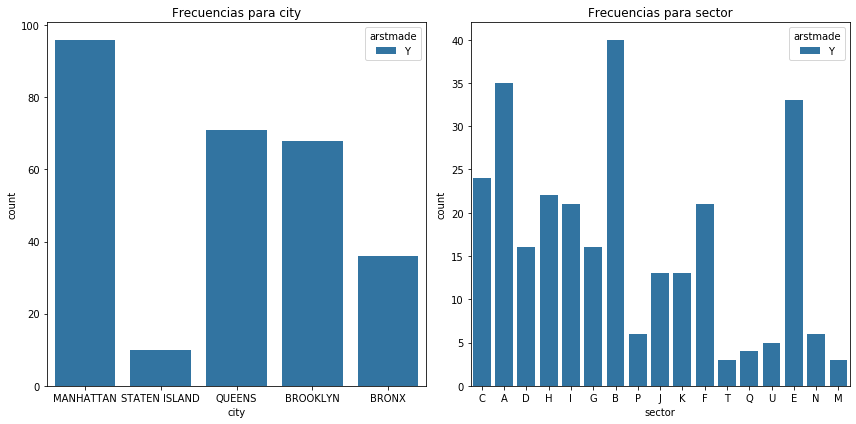

In [22]:
bar_counts_cat(df_arrestos,["city","sector"],(1,2),(12,6),"arstmade")

## Inspección Variable Objetivo __Violence__
- Incialmente, esta variable se encuentra repartida entre 9 columnas del dataframe:

In [23]:
df2_train.loc[:, df2_train.columns.str.startswith('pf')].columns
df2_test.loc[:, df2_test.columns.str.startswith('pf')].columns

Index(['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton',
       'pf_hcuff', 'pf_pepsp', 'pf_other'],
      dtype='object')

### - La condición necesaría para determinar si hubo o no violencia policial durante la detención es si en alguna de las filas, de las columnas anteriores,  tenga un valor `Y`.

### Uso de Violencia Policial:
### Creando columna target `violence`, a partir de la condición señalada anteriormente

In [24]:
df2_train['violence'] = np.where((df2_train['pf_hands'] == 'N') & (df2_train['pf_wall'] == 'N') 
                                & (df2_train['pf_grnd'] == 'N')& (df2_train['pf_drwep'] == 'N')
                                & (df2_train['pf_ptwep'] == 'N')& (df2_train['pf_baton'] == 'N')
                                & (df2_train['pf_hcuff'] == 'N')& (df2_train['pf_pepsp'] == 'N') 
                                & (df2_train['pf_other'] == 'N'),'N', 'Y')


In [25]:
df2_test['violence'] = np.where((df2_test['pf_hands'] == 'N') & (df2_test['pf_wall'] == 'N') 
                                & (df2_test['pf_grnd'] == 'N')& (df2_test['pf_drwep'] == 'N')
                                & (df2_test['pf_ptwep'] == 'N')& (df2_test['pf_baton'] == 'N')
                                & (df2_test['pf_hcuff'] == 'N')& (df2_test['pf_pepsp'] == 'N') 
                                & (df2_test['pf_other'] == 'N'),'N', 'Y')

In [26]:
print(df2_train.shape)
print(df2_test.shape)
df2_train.head()

(4636, 73)
(4747, 73)


,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,month,meters,violence
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,4,1.798320,N
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,BRONX,E,U,10,1.920240,N
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,12,1.676400,N
5,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,5,1.767840,N
6,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,N,U,11,1.557528,N


### - Quitando columnas `pf`

In [27]:
df2_train = df2_train[df2_train.columns.drop(list(df2_train.filter(regex='pf')))]
df2_test = df2_test[df2_test.columns.drop(list(df2_test.filter(regex='pf')))]

In [28]:
df2_train.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'radio',
       'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth',
       'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir',
       'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time',
       'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis',
       'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race',
       'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat', 'month',
       'meters', 'violence'],
      dtype='object')

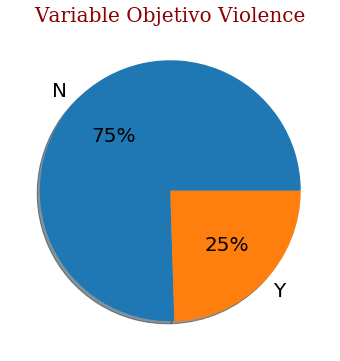

In [29]:
def circ_violence():
    font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 15}
    plot_size = plt.rcParams["figure.figsize"] 
    plot_size[0] = 8
    plot_size[1] = 6
    plt.rcParams["figure.figsize"] = plot_size 
    ax=df2_train.violence.value_counts().plot(kind='pie', autopct='%1.0f%%',shadow=True,fontsize=20)
    plt.title('Variable Objetivo {}'.format("Violence"),fontdict=font,fontsize=20)
    #ax.set_xlabel('')
    ax.set_ylabel('')
circ_violence()

## Uso Violencia Policial, según:
- __Características Físicas del sospechoso__

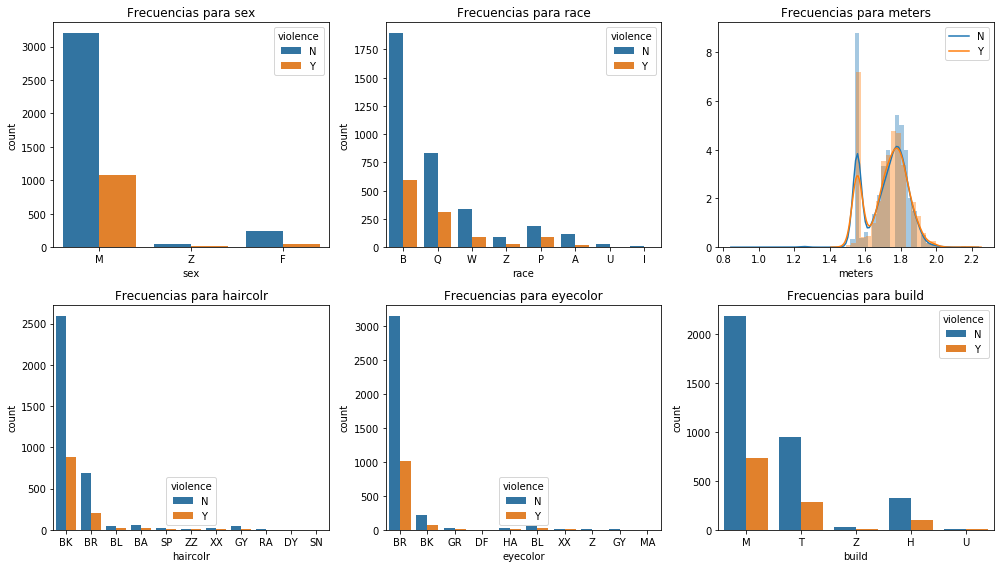

In [30]:
bar_counts_cat(df2_train,lista_sospec,(2,3),(14,8),"violence")

## Uso Violencia Policial, según:
### - __Características de Ciudad y Sector__

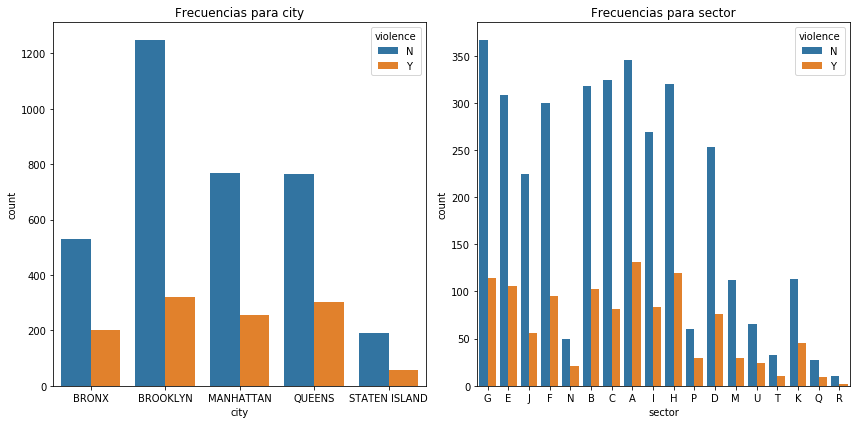

In [31]:
bar_counts_cat(df2_train,["city","sector"],(1,2),(12,6),"violence")

### __Localizando por medio de Geopandas ubicación de los procedimientos policiales en NY__
- Preparación de los datos
    - Instalar modulo pyproj - para cambio de coordenadas del dataframe a latitud y longitud de mapas "reales"
    - Importar modulo geopandas

### Geolocalización de Procedimientos Policiales NY

__Librerias requeridas__

In [32]:
import pyproj
import geopandas as gpd
import shapely
#from shapely.geometry import Point, Polygon

__Conversión de coordenadas registradas en procedimientos a Longitud y Latitud__

In [33]:
def myproj(x,y):
    projstr = '+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
    myproj = pyproj.Proj(projstr, preserve_units=True)
    #x,y = (1013067, 238633)
    return myproj(x, y, inverse=True)

### - Generando subset [target,coordendaX,coordenadaY]

In [34]:
df3_subset=df[["arstmade",'sex','race','city','sector',"xcoord","ycoord"]]
df3_subset.head(20)

,arstmade,sex,race,city,sector,xcoord,ycoord
0,N,M,B,BRONX,G,1013067,0238633
1,N,M,A,QUEENS,J,1012043,0212157
2,N,M,Q,BRONX,E,1017599,0240200
3,N,M,B,BROOKLYN,J,1002625,0183442
4,N,M,Q,QUEENS,H,1024535,0209890
5,N,M,B,MANHATTAN,F,0986061,0213320
6,N,M,B,BROOKLYN,N,1004543,0180604
7,N,F,B,BROOKLYN,G,1016397,0183357
8,N,M,W,MANHATTAN,B,1002850,0251332
9,N,M,B,BROOKLYN,N,1004742,0180773


### - Limpiando filas vacías

In [35]:
df3_subset['xcoord'].replace(' ', np.nan, inplace=True)
df3_subset['ycoord'].replace(' ', np.nan, inplace=True)
df3_subset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False).head(20)

,arstmade,sex,race,city,sector,xcoord,ycoord
0,N,M,B,BRONX,G,1013067,0238633
1,N,M,A,QUEENS,J,1012043,0212157
2,N,M,Q,BRONX,E,1017599,0240200
3,N,M,B,BROOKLYN,J,1002625,0183442
4,N,M,Q,QUEENS,H,1024535,0209890
5,N,M,B,MANHATTAN,F,0986061,0213320
6,N,M,B,BROOKLYN,N,1004543,0180604
7,N,F,B,BROOKLYN,G,1016397,0183357
8,N,M,W,MANHATTAN,B,1002850,0251332
9,N,M,B,BROOKLYN,N,1004742,0180773


__Convertir coordenadas registradas a tipo numérica__

In [36]:
df3_subset["x1coord"] = pd.to_numeric(df3_subset["xcoord"])
df3_subset["y1coord"] = pd.to_numeric(df3_subset["ycoord"])

__Creando columnas Longitud y Latitud__

In [37]:
def coord_lat_long(df,xcoord,ycoord):
    #df=df.dropna()
    listax=df[xcoord].tolist()
    listay=df[ycoord].tolist()
    listado=list(zip(listax,listay))
    longitude=[]
    latitude=[]
    for i,n in enumerate(listado):
        a=myproj(n[0],n[1])
        longitude.append(round(a[0],3))
        latitude.append(round(a[1],3))
    return (longitude,latitude)

In [38]:
df3_subset["Longitude"],df3_subset["Latitude"] = coord_lat_long(df3_subset,'x1coord','y1coord')

In [39]:
df3_subset=df3_subset.dropna()

### - Creando columna `geometry` Geopandas, necesaria para localizar en mapa real NY

In [40]:
crs = {'init':'epsg:4326'}
geometry = [shapely.geometry.Point(xy) for xy in zip(df3_subset['Longitude'], df3_subset['Latitude'])]
df3_subsetGDF = gpd.GeoDataFrame(df3_subset,crs = crs,geometry = geometry)
# Convert geometry to OSGB36
df3_subsetGDF = df3_subsetGDF.to_crs(epsg=3857)

In [41]:
df3_subsetGDF.head()

,arstmade,sex,race,city,sector,xcoord,ycoord,x1coord,y1coord,Longitude,Latitude,geometry
0,N,M,B,BRONX,G,1013067,0238633,1013067.0,238633.0,-73.896,40.822,POINT (-8226065.092 4986122.051)
1,N,M,A,QUEENS,J,1012043,0212157,1012043.0,212157.0,-73.900,40.749,POINT (-8226510.370 4975389.418)
2,N,M,Q,BRONX,E,1017599,0240200,1017599.0,240200.0,-73.880,40.826,POINT (-8224283.980 4986710.481)
3,N,M,B,BROOKLYN,J,1002625,0183442,1002625.0,183442.0,-73.934,40.670,POINT (-8230295.232 4963787.918)
4,N,M,Q,QUEENS,H,1024535,0209890,1024535.0,209890.0,-73.855,40.743,POINT (-8221500.993 4974507.808)


###  Uniendo mapa NY y df3_subsetGDF
- Para ello se construye la funcion geoplots, que recibe como parámetro un dataset geopandas y una lista de columnas a analizar en función a la variable objetivo `arstmade`

In [42]:
def geoplots(df,lista):
    fig = plt.figure(figsize = (25, 15))
    fig.suptitle('Geolocalizacón Procedimiento Policial\n New York City 2009', fontsize=18)
    #fig.figsize = (15, 10)
    fig.subplots_adjust(hspace=0.2, wspace=-0.5)
    ny = gpd.read_file(gpd.datasets.get_path('nybb'))
    color=["yellow","red","green","magenta","black","white","cyan","blue"]
    for i,n in enumerate(lista):
        ax = fig.add_subplot(2, 2, i+1)
        ny.to_crs(epsg=3857).plot(ax=ax,edgecolor='black',color="#EFEFEF",alpha=1)
   
        k=0
        for l in df3_subsetGDF[n].unique():
            df[df[n]==l].plot(ax=ax, marker="o", markersize=5,color=color[k], alpha=1,label=str(l))
            k+=1
            legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large',markerscale=5)
            legend.get_frame().set_facecolor('lightgrey')  
            ax.title.set_text(str(n).upper())
            ax.set_title(n,fontsize=18)
            #axes.titlesize:'large'  
        ax.get_xaxis().set_visible(False)   
        ax.get_yaxis().set_visible(False)

### - El principal interés radica localizar los eventos policiales categorizados como `arstmade` (arrestos) , relacionada a `city`, `sex` y `race`.

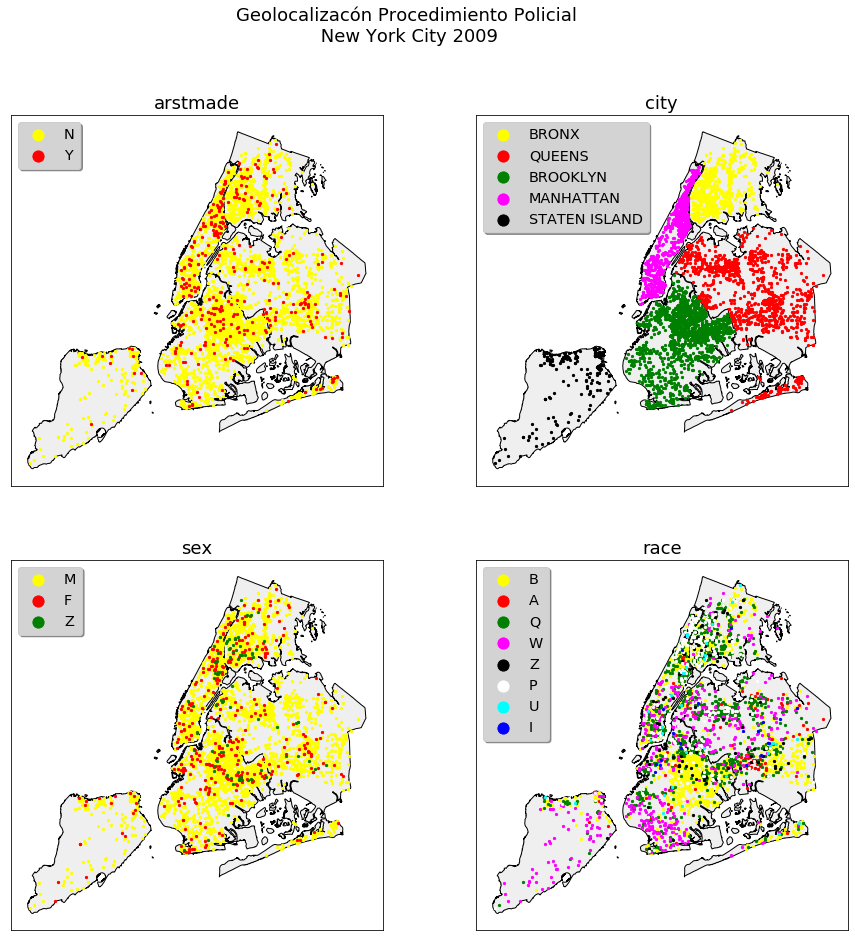

In [43]:
geoplots(df3_subsetGDF,["arstmade","city","sex","race"])

### - Es conveniente esta estrategia porque confirma los hallazgos exploratorios, y profundiza en la distribución de los principales componentes de un arresto, tanto características físicas como de ubicación. 
### - Manhattan es el sector, con mayor cantidad de arrestros y se sitúan al norte de este sector.
### - Comúnmente los procedimientos policiales en Brooklyn, son hacia personas de raza B (negra).
### - Enfocandose en `city` podemos señalar que los procedimientos en State Island están focalizados hacia el norte de la ciudad. Como también los procedimientos son concurrentes en personas de raza W(blanca).

## Preprocesamiento de los Datos
- ### Si bien, durante la inspección de los datos ya se realizó un trabajo de preprocesamiento, principalmente, para equilibrar la cantidad de columnas, recodificar las columnas `pf` y la creación de una nueva columna `violence`. Falta necesariamente, generar variables dummies en las variables categóricas
    
    ### - Recodificación de variables categóricas
    ### - Verificar igualdad de cantidad de columnas `df_train` y `df_test`
    ### - Comprobar datos nulos

In [44]:
df2_train.sample()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,month,meters,violence
3886,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BROOKLYN,F,3,7,1.557528,N


In [45]:
df2_train.city.unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [46]:
df2_test.sample()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,month,meters,violence
1287,1,O,P,P,Y,Y,N,N,N,N,...,Q,BR,BR,T,BROOKLYN,C,15,10,1.73736,N


In [47]:
df2_test.arstmade.value_counts('%')

N    0.934906
Y    0.065094
Name: arstmade, dtype: float64

In [48]:
df2_train.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'radio',
       'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth',
       'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir',
       'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time',
       'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis',
       'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race',
       'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat', 'month',
       'meters', 'violence'],
      dtype='object')

In [49]:
df2_test.city.unique()

array(['MANHATTAN', 'BRONX', 'QUEENS', 'BROOKLYN', 'STATEN IS'],
      dtype=object)

### Rename sector `STATE IS` --> `STATEN ISLAND`

In [50]:
df2_test.city = df2_test.city.str.replace('STATEN IS', 'STATEN ISLAND')

In [51]:
df2_test.city.unique()

array(['MANHATTAN', 'BRONX', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [52]:
df2_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [53]:
for i in df2_train.columns:
    if len(df2_train[i].unique().tolist())>30:
        print(i)

beat


In [54]:
df2_test.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [55]:
listado_object=[]
listado_non_object=[]
for i in df2_train.columns:
    if df2_train[i].dtype=='O':
        listado_object.append(i)
    else:
        listado_non_object.append(i)
print("cantidad de columnas object ",len(listado_object))
print("cantidad de columnas non object ",listado_non_object,len(listado_non_object))

cantidad de columnas object  62
cantidad de columnas non object  ['month', 'meters'] 2


In [56]:
df2_train_dummies = pd.get_dummies(df2_train, drop_first=True, columns=listado_object)
df2_train_dummies.head()

,month,meters,recstat_A,inout_O,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_P,typeofid_R,typeofid_V,...,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,violence_Y
0,4,1.798320,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10,1.920240,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,12,1.676400,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1.767840,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,11,1.557528,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df2_test_dummies = pd.get_dummies(df2_test, drop_first=True, columns=listado_object)
df2_test_dummies.head()

,month,meters,recstat_A,inout_O,trhsloc_P,trhsloc_T,typeofid_P,typeofid_R,typeofid_V,explnstp_Y,...,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,violence_Y
0,11,1.82880,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,9,1.85928,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,6,1.85928,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,11,1.85928,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,3,1.55448,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df2_test_dummies.arstmade_Y.value_counts('%')

0    0.934906
1    0.065094
Name: arstmade_Y, dtype: float64

__Igualando columnas df2_dummies_train y df2_dummies_test__

In [59]:
a_test=[x for x in df2_test_dummies.columns if x not in df2_train_dummies.columns]
print(a_test)

['eyecolor_VI', 'beat_   2', 'beat_   3', 'beat_   4', 'beat_   5', 'beat_   6', 'beat_   7', 'beat_   8', 'beat_   9', 'beat_  10', 'beat_  11', 'beat_  12', 'beat_  13', 'beat_  14', 'beat_  15', 'beat_  16', 'beat_  17', 'beat_  18', 'beat_  19', 'beat_  20', 'beat_  21', 'beat_  22', 'beat_  23', 'beat_  24', 'beat_  25', 'beat_  41', 'beat_  42', 'beat_  61', 'beat_  62', 'beat_1', 'beat_26', 'beat_28', 'beat_30']


In [60]:
df2_test_dummies=df2_test_dummies.drop(a_test,axis=1)
df2_test_dummies.shape

(4747, 140)

In [61]:
a_train=[x for x in df2_train_dummies.columns if x not in df2_test_dummies.columns]
print(a_train)

['trhsloc_U', 'haircolr_SN', 'beat_32']


In [62]:
df2_train_dummies=df2_train_dummies.drop(a_train,axis=1)
df2_train_dummies.shape

(4636, 140)

In [63]:
a_train=[x for x in df2_train_dummies.columns if x not in df2_test_dummies.columns]
print(a_train)

[]


__El hecho que podamos eliminar estas columnas, es debido a que los procedimientos policiales no fueron aplicados con el mismo criterio para registrar la información. Es por ello que hay diferencias entre el año 2009 y 2010. Además, si por ejemplo se considera que haircolr_SN que significa color de pelo rubio rojizo, es una cantidad minima en comparación a otros colores de pelo.__

### __Correlaciones__

In [64]:
def total_correlaciones(df, value=0.7):
    plt.figure(figsize=(15, 6))
    M = df.corr()
    value_corr = M[((M > value) & (M < 1) | (M < -value))
                  ].dropna(axis=0, how='all').dropna(axis=1, how='all')
    ax=sns.heatmap(value_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),annot=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title("Corralaciones Totales")

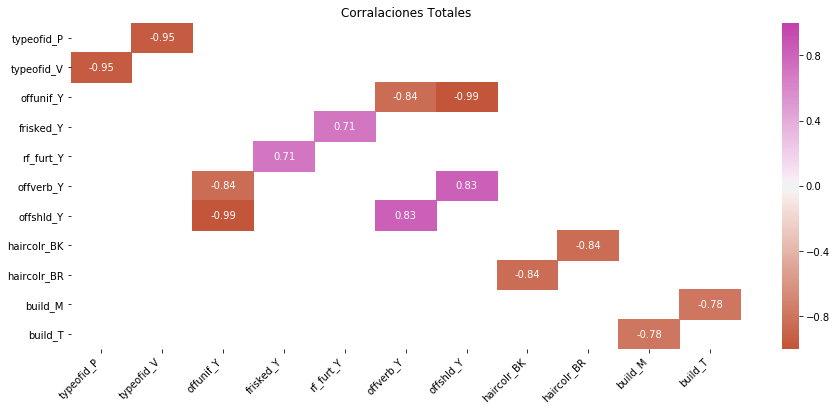

In [65]:
total_correlaciones(df2_train_dummies)

### No se observa ninguna alta correlación con variable `arstmade` ni `violence`

### __Comprobando datos nulos__

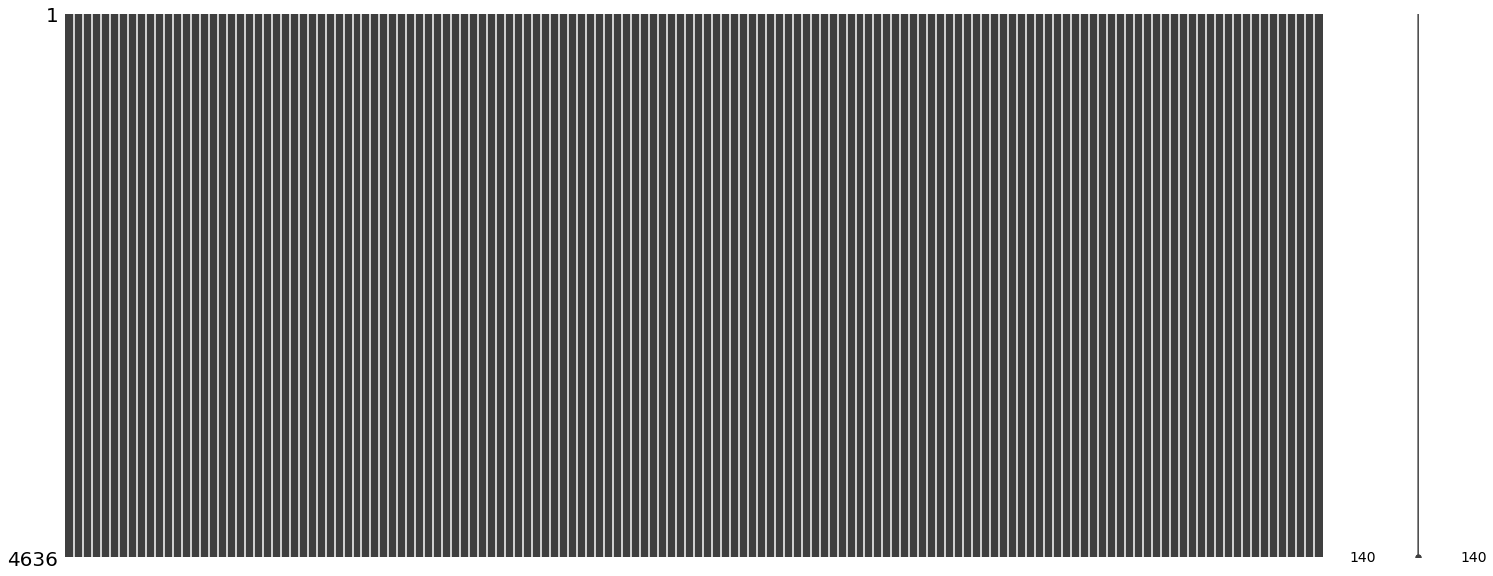

In [66]:
import missingno as msngo
msngo.matrix(df2_train_dummies)

### __Con esto nos aseguramos que no existen datos nulos en las columnas que serán consideradas para los modelos de Predicción__

## __Modelos de Predicción__
- ### __target: `arstmade_Y`__

### __Seleccionando Train y Test__

In [80]:
X_mat = df2_train_dummies.drop(columns='arstmade_Y')
X_train = df2_train_dummies.drop(columns='arstmade_Y')
y_train = df2_train_dummies['arstmade_Y']

X_test = df2_test_dummies.drop(columns='arstmade_Y')
y_test = df2_test_dummies['arstmade_Y']

### __Estandarizando__

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### __Modelo 1: LogisticRegression__

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)
y_hat=model_lr.predict(X_test)

In [84]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.81      0.60      0.69       309

    accuracy                           0.96      4747
   macro avg       0.89      0.79      0.83      4747
weighted avg       0.96      0.96      0.96      4747



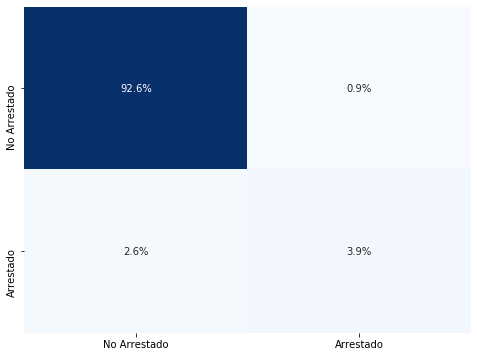

In [85]:
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

__El desbalance de clases que existe en target `arstmade`, genera diferencia en las métricas de cada clase, Es por ello que, se utilizará smote para agregar elementos de la clase minoritaria__

In [86]:
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=1, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

Using TensorFlow backend.


### __Modelo 2: LogisticRegression con Smote__

In [93]:
model_lr_smote = LogisticRegression(random_state=1,verbose=2,max_iter=200)
model_lr_smote.fit(X_train_oversamp, y_train_oversamp)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=2,
                   warm_start=False)

In [94]:
print(classification_report(y_test, model_lr_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4438
           1       0.34      0.72      0.46       309

    accuracy                           0.89      4747
   macro avg       0.66      0.81      0.70      4747
weighted avg       0.94      0.89      0.91      4747



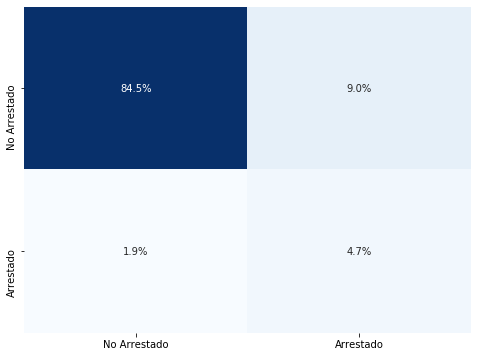

In [95]:
y_hat=model_lr_smote.predict(X_test)
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

### __Modelo 3: LDA__

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model= LDA()
lda_model_entrenado = lda_model.fit(X_train_oversamp, y_train_oversamp)
y_hat = lda_model_entrenado.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      4438
           1       0.41      0.74      0.52       309

    accuracy                           0.91      4747
   macro avg       0.69      0.83      0.74      4747
weighted avg       0.94      0.91      0.92      4747



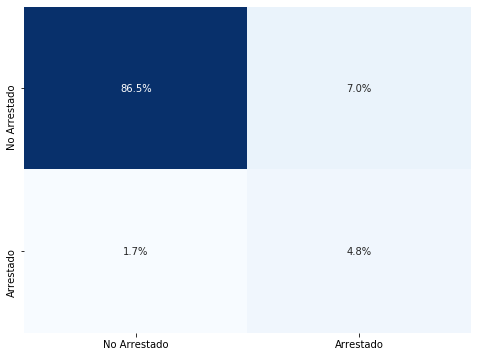

In [97]:
y_hat=lda_model_entrenado.predict(X_test)
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

### __Modelo 4: RandomForestClassifier__

In [105]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300,600 ,1000]
}
rf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [113]:
grid_search.fit(X_train_oversamp, y_train_oversamp)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 25.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boo

In [114]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [98]:
#best_rf = RandomForestClassifier(bootstrap= True,max_depth= 100,max_features= 3,min_samples_leaf= 3,min_samples_split= 10,n_estimators= 600,random_state=1)

In [115]:
best_rf = RandomForestClassifier(bootstrap= True,max_depth= 80,max_features= 3,min_samples_leaf= 3,min_samples_split= 10,n_estimators= 200,random_state=1)

In [116]:
best_rf_entrenado=best_rf.fit(X_train_oversamp, y_train_oversamp)

In [117]:
y_hat = best_rf_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4438
           1       0.86      0.39      0.54       309

    accuracy                           0.96      4747
   macro avg       0.91      0.69      0.76      4747
weighted avg       0.95      0.96      0.95      4747



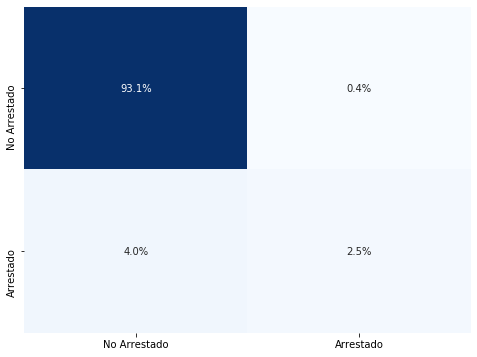

In [118]:
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

## __Modelo 5: SVM__

In [317]:
from sklearn.svm import SVC

In [318]:
params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1],}

In [323]:
estimate_cv = GridSearchCV(SVC(kernel='linear',random_state = 1), params,cv=2,n_jobs=-1)
estimate_cv_result = estimate_cv.fit(X_train_oversamp, y_train_oversamp)
model_svm=estimate_cv_result

In [361]:
y_hat = model_svm.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4438
           1       0.32      0.73      0.45       309

    accuracy                           0.88      4747
   macro avg       0.65      0.81      0.69      4747
weighted avg       0.94      0.88      0.90      4747



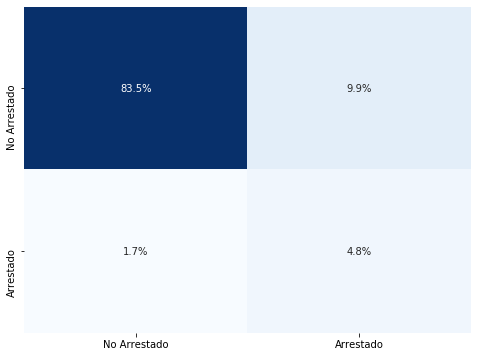

In [362]:
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

## __Modelo 6:  Naive_Bayes BernoulliNB__

In [312]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb=model_nb.fit(X_train_oversamp, y_train_oversamp)
print(classification_report(y_test, model_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      4438
           1       0.40      0.74      0.52       309

    accuracy                           0.91      4747
   macro avg       0.69      0.83      0.74      4747
weighted avg       0.94      0.91      0.92      4747



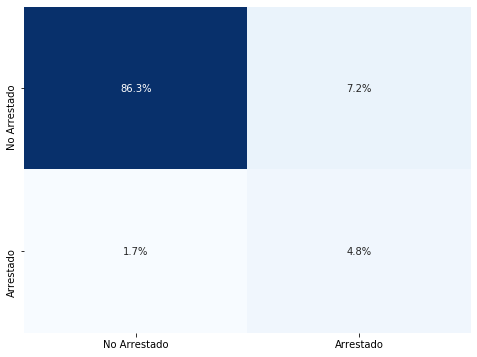

In [363]:
y_hat=model_nb.predict(X_test)
auxiliares.matriz_confusion(y_test,y_hat,["No Arrestado","Arrestado"])

## __Modelo 7:  AdaBoost__

In [106]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_ab = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

In [107]:
ab_grid = GridSearchCV(AdaBoostClassifier(random_state = 1),param_grid = param_grid_ab,n_jobs=-1).fit(X_train_oversamp, y_train_oversamp)

In [174]:
yhat_ab=ab_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat_ab))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.76      0.58      0.66       309

    accuracy                           0.96      4747
   macro avg       0.87      0.78      0.82      4747
weighted avg       0.96      0.96      0.96      4747



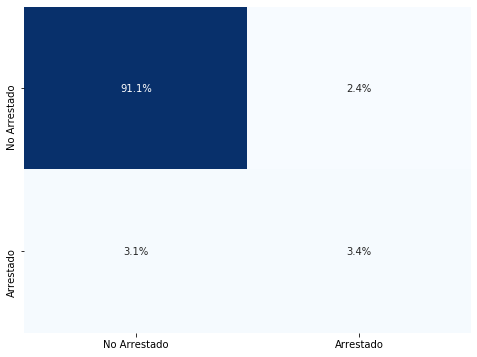

In [364]:
auxiliares.matriz_confusion(y_test,yhat_ab,["No Arrestado","Arrestado"])

## __Roc_Curve__


In [367]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

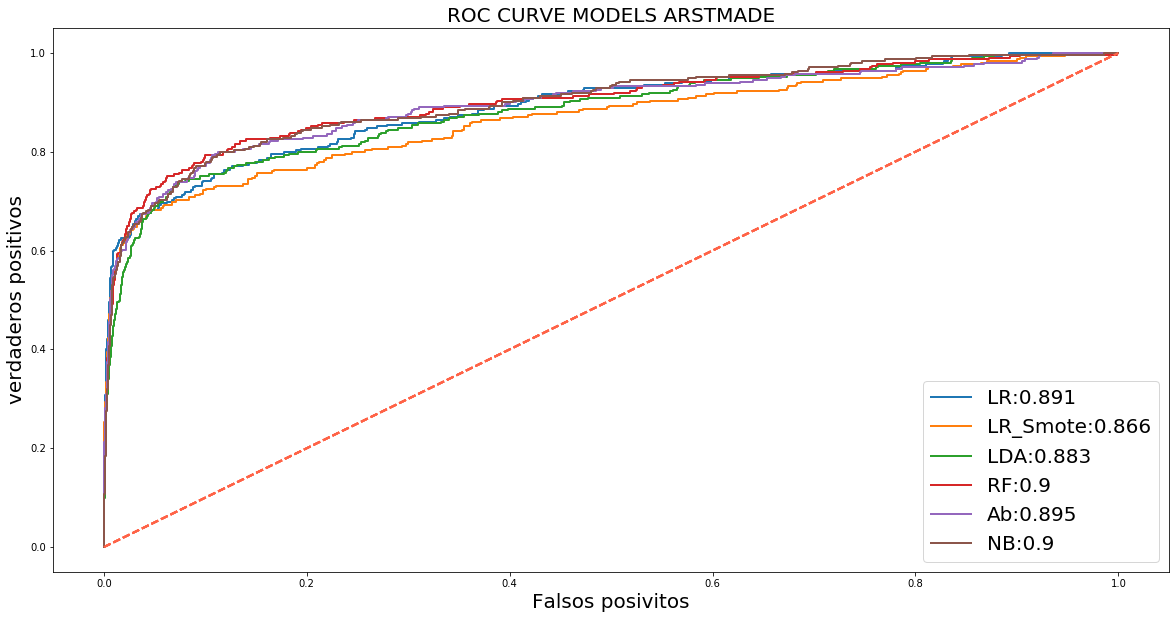

In [369]:
plt.figure(figsize=(20, 10))
models = [('LR', model_lr),('LR_Smote', model_lr_smote),('LDA',lda_model_entrenado),('RF',best_rf_entrenado),('Ab',ab_grid),('NB',model_nb)]

for i,(name,model) in enumerate(models):
    yhat_pr= model.predict_proba(X_test)[:,1]
    auc_score=roc_auc_score(y_test, yhat_pr)
    auc_score=round(auc_score,3)
    false_positive,true_positive,threshold = roc_curve(y_test,yhat_pr)
    plt.plot(false_positive,true_positive,lw=2,label=name+str(':'+ str(auc_score)))
    plt.plot([0,1],linestyle="--",lw=2,color="tomato")
plt.ylabel("verdaderos positivos",fontsize=20)
plt.xlabel("Falsos posivitos",fontsize=20)
plt.title("ROC CURVE MODELS ARSTMADE",fontsize=20)
plt.legend(fontsize=20)


### __Los modelos están sobre un 40% en comparación a un modelo aleatorio E(cara,sello)__

## __Mejores Modelos__
- ### Es importante mencionar, que oversampling hizo que los modelos hayan mejorado las predicciones de manera correcta sobre la clase que nos interesa que es una persona haya sido arrestada.
- ### Considerando los aspectos métricos de Classification report, confucion matrix y Roc_curve_score, tenemos que:    
    - ### Los modelos `LogisticRegression`, `RandomForestClassifier` y `AdaBoostClassifier` son altos en la matriz de confusión con un 96,5%, 95,6% y 94,5% de accuracy respectivamente, es decir,el número de predicciones correctas realizadas por el modelo. Tanto `AB` y `LR` tienen mayor predicciones correctas respecto a la clase que de interés, es decir, que una persona sea arrestada, esto según `confusion matrix`.
    - ### Particularmente, la precisión más alta en nuestro clasificador de interés en `RF` fue 0.88, `LR` fue de 0.81 y `AB`0.76. 
    - ### Los modelos `RandomForestClassifier` , `AdaBoostClassifier` y `NaiveBayes-Bernoulli`tienen un roc_auc_score más alto, esto significa, que mientras más alto, el modelo entiende mejor la separabilidad de las clases predichas.
    - ### A pesar, de que `RF` tiene un bajo recall, esta métrica, indica una relación respecto a falsos negativos, es decir, de que __no__ sea el clasificador esperado y  en el particular interés de este trabajo, es si una persona sea arrestada. 
    
- ### En consecuencia, si queremos centrarnos más en minimizar los falsos negativos, el foco sería recall cercano al 100%, en cambio si se enfoca en minimizar los falsos positivos, entonces nuestro enfoque debe ser Precisión lo más cercana posible al 100%.
- ### En lo que sigue, se utilizará `RF`, para calculo de probabilidades de Arresto.


### __Guardando Mejores Modelos__

In [108]:
pickle.dump(best_rf_entrenado, open("modelo_rf.sav","wb"))
pickle.dump(ab_grid, open("modelo_ab.sav","wb"))

## __Atributos más Relevantes respecto a `arstmade`__

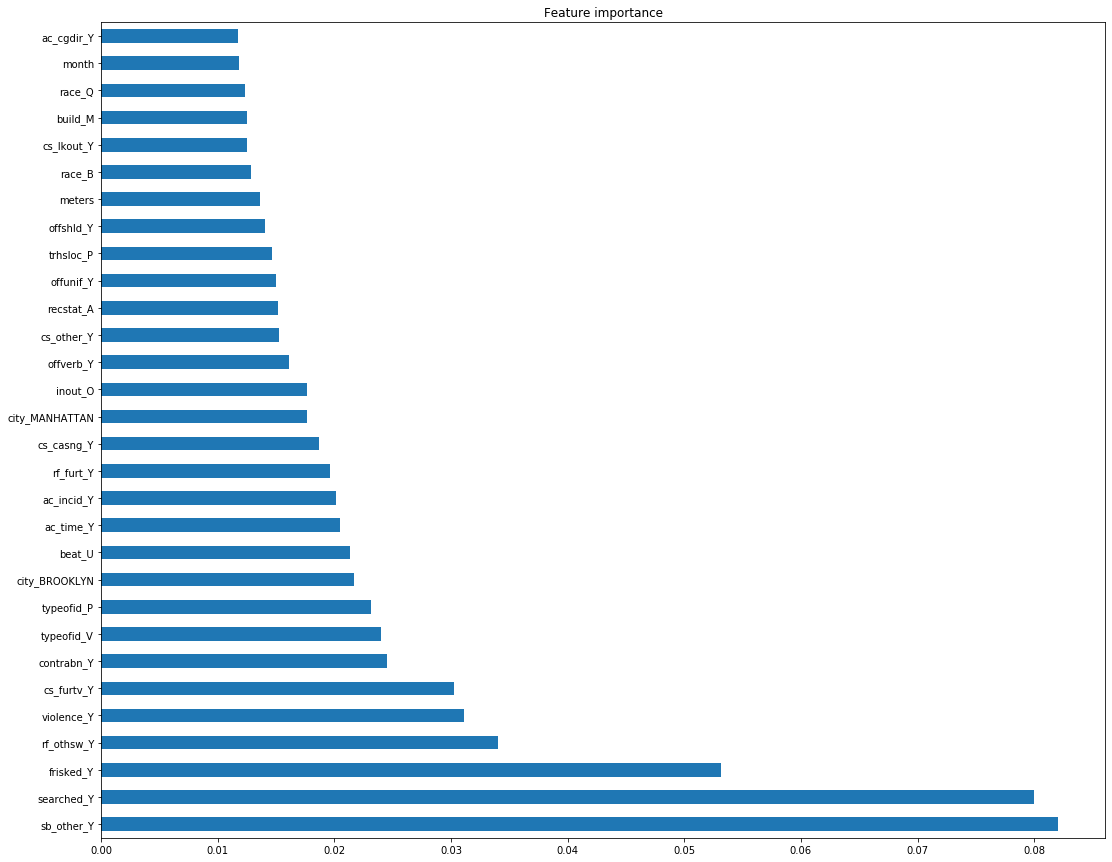

In [119]:
#auxiliares.plot_importance(best_rf_entrenado,X_train_oversamp.columns)
fig = plt.figure(figsize = (18,15))
important_features=auxiliares.plot_importance(grid_search.best_estimator_,X_mat.columns)

## __Probabilidad de ser arrestado__
__Solución:__
   - ### La probabilidad de un arresto requiere de la condición del target `arstmade = 1` 
   - ###  Se creará una columna `predicción` en el dataset de df2_test (previo al dummy de las columnas)
   - ###  La columna predicción almacenará las predicciones del modelo `RandomForestClassifier` respecto de los arrestos 2010 (X_test)   
   - ### Seleccionando solo filas con la condición ['predicción']==1, y se utilizarán las condiciones según sea el enunciado de las pregundas, comenzando con la condición de arrestos según `city`, `sex` y `race`. Estas últimas,  dado para cada una de las ciudades.
   - ### Para facilitar la interpretación, las probabilidades se mostrarán a través, de `barplots`.
 
### - `City` 


In [120]:
df_prob_arstmade=df2_test
df_prob_arstmade["prediccion"] = best_rf_entrenado.predict(X_test)
proba=df_prob_arstmade[df_prob_arstmade["prediccion"]==1]

In [121]:
df_city_prob=100*proba["city"].value_counts('%')
df_city_proba = df_city_prob.rename_axis('city').reset_index(name='probabilidades')

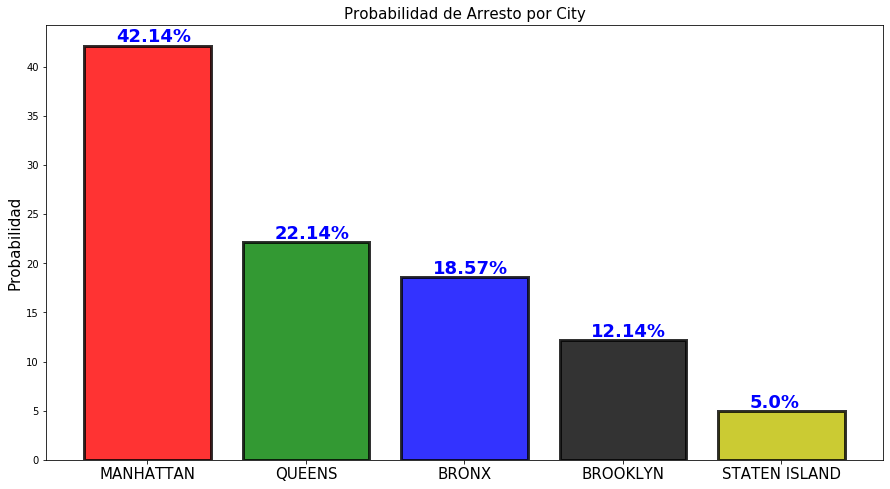

In [122]:
fig = plt.figure(figsize = (15,8))
my_colors = 'rgbky'
plt.bar(df_city_proba.city, df_city_proba.probabilidades, align='center', alpha=0.8,edgecolor='black',linewidth=3,color=my_colors)
plt.ylabel('Probabilidad',fontsize=15)
plt.title('Probabilidad de Arresto por City',fontsize=15)
plt.xticks(fontsize=15)
for i, v in enumerate(df_city_proba.probabilidades):
    plt.text(i-0.2, v + .35, str(round(v,2))+"%", color='blue', fontweight='bold',fontsize=18)


### Análisis
   - ### Del gráfico anterior, se sabía que en`MANHATTAN` era la ciudad donde ocurrían la mayor cantidad de procedimientos policiales que terminaban con arrestos, es justamente en esta ciudad donde hay mayor probabilidad, aproximadamente por sobre el doble de `QUEENS`que es la segunda ciudad donde ocurren mayor cantidad de arrestos.

### - `Genero`

In [123]:
def proba_condicion(df,var,tam):
    listado=df[var].unique().tolist()
    fig = plt.figure(figsize = (tam[0],tam[1]))
    #fig.suptitle('Probabilidades por Genero', fontsize=18)
    #fig.figsize = (15, 10)
    fig.subplots_adjust(hspace=0.2, wspace=-0.5,top = 1.9)
    i=0
    my_colors = 'rgbky'
    for i,n in enumerate(listado):
        plt.subplot(len(listado),1,i+1)
        df_city_sexo_prob=100*df[df[var]==n]["city"].value_counts('%')
        df_city_sexo_proba = df_city_sexo_prob.rename_axis('city').reset_index(name='probabilidades')
        plt.bar(df_city_sexo_proba['city'], df_city_sexo_proba['probabilidades'], align='center', alpha=0.8,edgecolor='black',linewidth=3,color=my_colors)
        
        plt.ylabel('Probabilidad',fontsize=15)
        plt.title('Probabilidad de Arresto '+var+':'+(n),fontsize=18)
        plt.xticks(fontsize=15)
        for i, v in enumerate(df_city_sexo_proba.probabilidades):
            plt.text(i-0.2, v + .35, str(round(v,2))+"%", color='blue', fontweight='bold',fontsize=18)

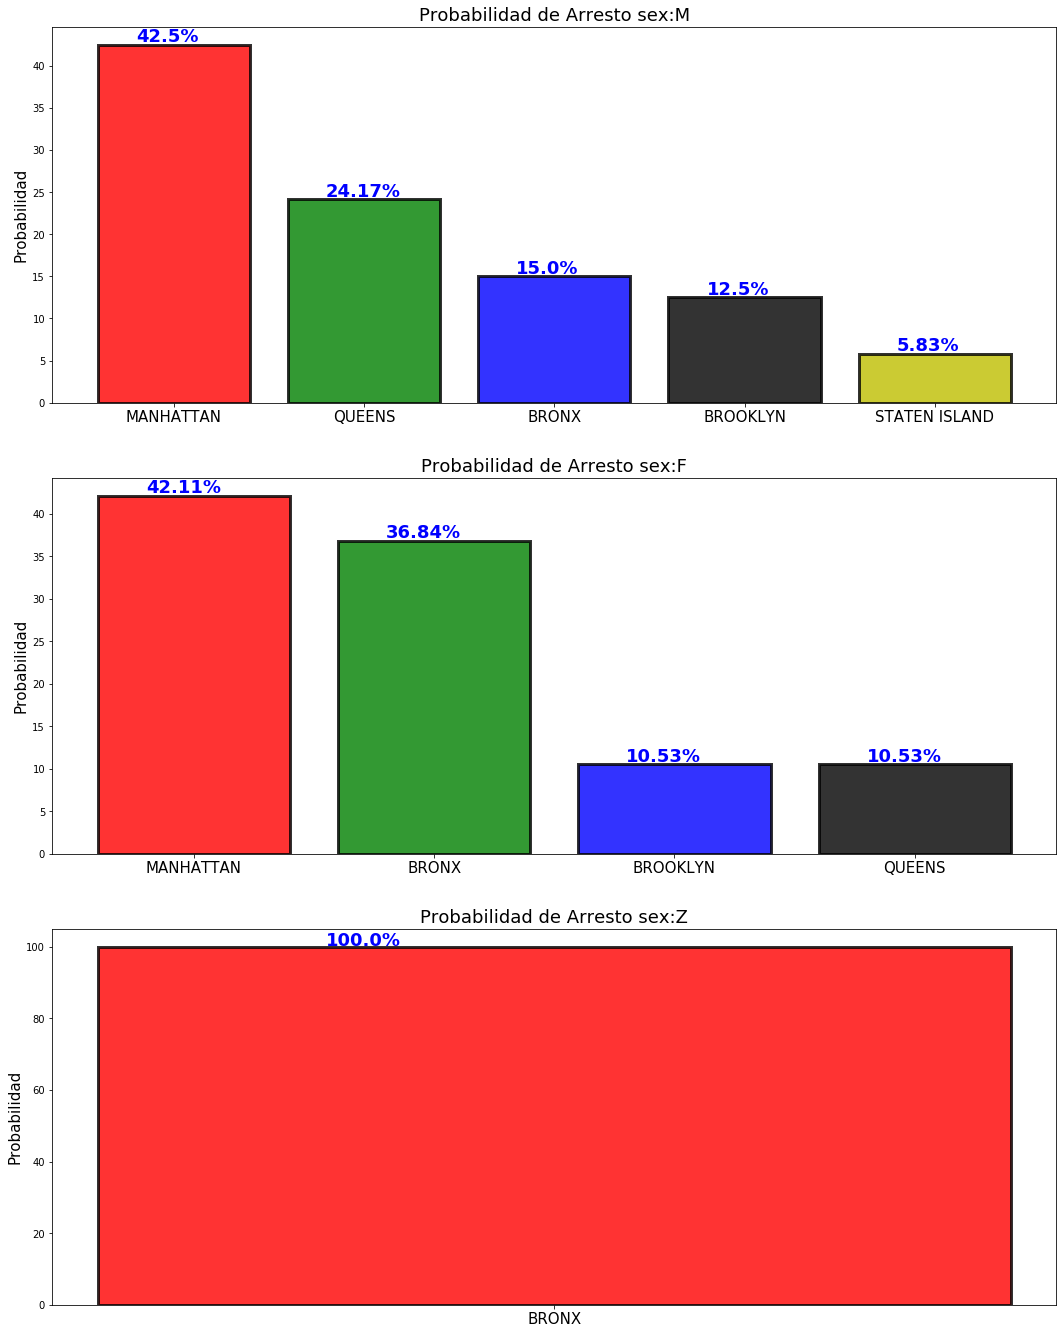

In [124]:
proba_condicion(proba,"sex",(18,10))

### Análisis
   - ### En `MANHATTAN`, hay mayor probabilidad de arrestar Hombres.
   - ### En `MANHATTAN` y `BRONX`, hay mayor probabilidad de arrestar mujeres. 
   - ### El modelo arroja que solo en `BRONX`, hay certeza de arrestar una persona con un sexo desconocido. 

### - `Race`

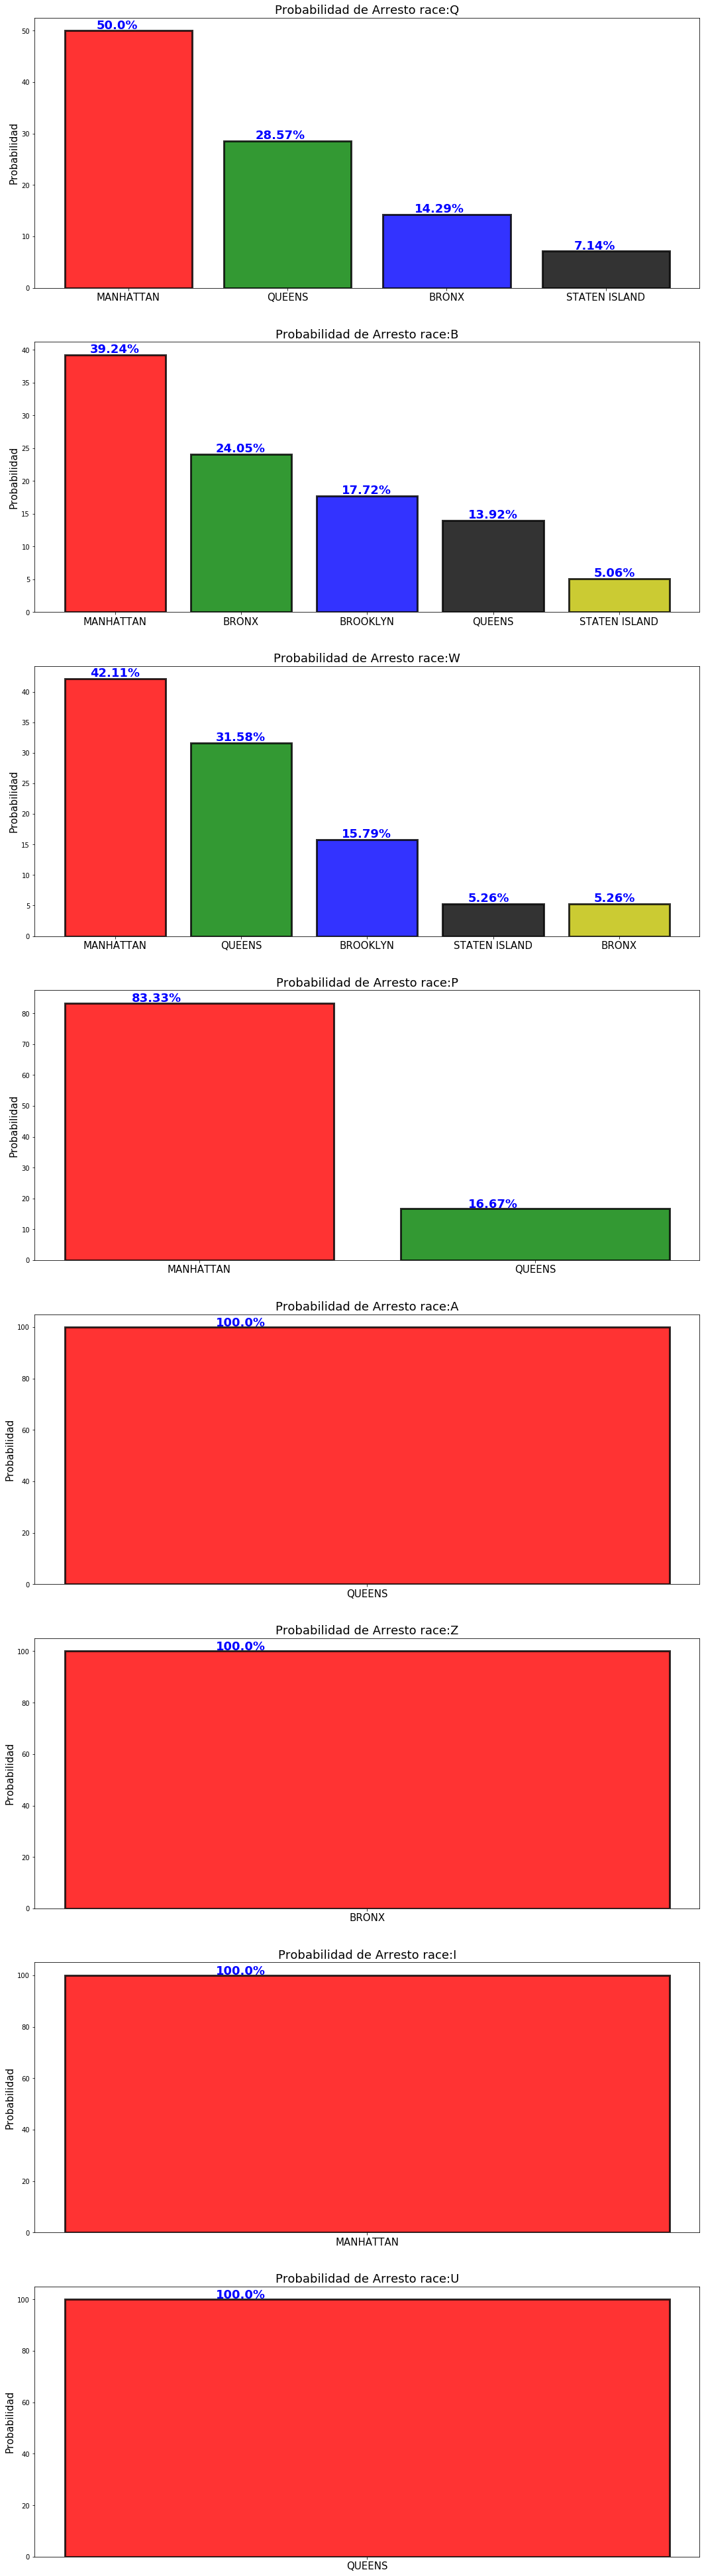

In [126]:
proba_condicion(proba,"race",(18,30))

### Análisis
   - ### La tendencia de las probabilidades de un arresto para cada tipo raza, se da en `MANHATAN`, salvo para razas distintas de Q(white-hispanic), W(white), B(black).
   - ### Las razas minoritarias muestran una certeza para ciertas ciudades de NY.

# __Violencia__
### __Seleccionando Train y Test__

In [583]:
X_mat = df2_train_dummies.drop(columns='violence_Y')
X_train = df2_train_dummies.drop(columns='violence_Y')
y_train = df2_train_dummies['violence_Y']

X_test = df2_test_dummies.drop(columns='violence_Y')
y_test = df2_test_dummies['violence_Y']

In [584]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## __Modelo 1:  LogisticRegression__

In [457]:
model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [458]:
model_lr_entrenado=model_lr.fit(X_train, y_train)

In [459]:
y_hat_lr=model_lr.predict(X_test)
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3639
           1       0.51      0.35      0.42      1108

    accuracy                           0.77      4747
   macro avg       0.66      0.63      0.64      4747
weighted avg       0.75      0.77      0.75      4747



## __Modelo 2:  LDA__

In [382]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda_model= LDA()
lda_model_entrenado = lda_model.fit(X_train, y_train)
y_hat_lda = lda_model_entrenado.predict(X_test)
print(classification_report(y_test, y_hat_lda))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3639
           1       0.50      0.37      0.42      1108

    accuracy                           0.77      4747
   macro avg       0.66      0.63      0.64      4747
weighted avg       0.75      0.77      0.75      4747



## __Modelo 3:  RandomForest__

In [390]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300,600 ,1000]
}
rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [385]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 14.2min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [387]:
best_rf = RandomForestClassifier(bootstrap= True,max_depth=80,max_features= 3,min_samples_leaf= 3,min_samples_split= 10,n_estimators= 300)

In [388]:
best_rf_entrenado=best_rf.fit(X_train, y_train)

In [389]:
y_hat_rf = best_rf_entrenado.predict(X_test)
print(classification_report(y_test, y_hat_rf))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3639
           1       0.40      0.00      0.00      1108

    accuracy                           0.77      4747
   macro avg       0.58      0.50      0.44      4747
weighted avg       0.68      0.77      0.67      4747



## __Modelo 4:  AdaBoost__

In [585]:
param_grid_ab = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

In [586]:
ab_grid_violence = GridSearchCV(AdaBoostClassifier(random_state = 1),param_grid = param_grid_ab,n_jobs=-1).fit(X_train, y_train)

In [587]:
ab_grid_violence_entrenado=ab_grid_violence.best_estimator_

In [588]:
yhat_ab=ab_grid_violence.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat_ab))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3639
           1       0.56      0.14      0.22      1108

    accuracy                           0.77      4747
   macro avg       0.67      0.55      0.54      4747
weighted avg       0.73      0.77      0.72      4747



## __Modelo 5:  NaiveBayes-Bernoulli__

In [589]:
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)
print(classification_report(y_test, model_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      3639
           1       0.45      0.59      0.51      1108

    accuracy                           0.73      4747
   macro avg       0.65      0.68      0.66      4747
weighted avg       0.77      0.73      0.75      4747



In [397]:
model_nb_entrando=model_nb.fit(X_train, y_train)

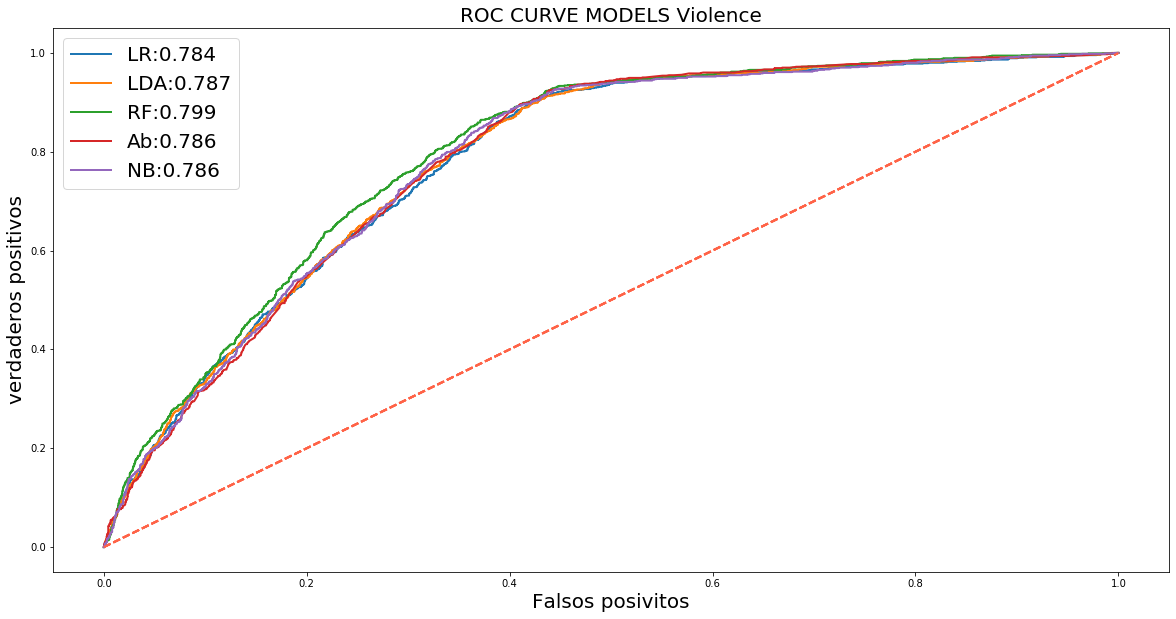

In [412]:
plt.figure(figsize=(20, 10))
models =[('LR', model_lr_entrenado),('LDA',lda_model_entrenado),('RF',best_rf_entrenado),('Ab',ab_grid_violence_entrenado),('NB',model_nb_entrando)]

for i,(name,model) in enumerate(models):
    yhat_pr= model.predict_proba(X_test)[:,1]
    auc_score=roc_auc_score(y_test, yhat_pr)
    auc_score=round(auc_score,3)
    false_positive,true_positive,threshold = roc_curve(y_test,yhat_pr)
    plt.plot(false_positive,true_positive,lw=2,label=name+str(':'+ str(auc_score)))
    plt.plot([0,1],linestyle="--",lw=2,color="tomato")
plt.ylabel("verdaderos positivos",fontsize=20)
plt.xlabel("Falsos posivitos",fontsize=20)
plt.title("ROC CURVE MODELS Violence",fontsize=20)
plt.legend(fontsize=20)

### __Analogamente, al análisis realizado con target `arstmade`, sin embargo, se utilizará `Ab`, por sus métricas algo más equilibradas, y por lo tanto, se utilizará como base probabilistico para el clasificador `violence_Y`.__

## __Evaluando Probabilidad de Violencia__

In [590]:
df_prob_violence=df2_test
df_prob_violence["prediccion"] = ab_grid_violence.best_estimator_.predict(X_test)
proba=df_prob_violence[df_prob_violence["prediccion"]==1]

In [591]:
df_city_prob=100*proba["city"].value_counts('%')
df_city_proba = df_city_prob.rename_axis('city').reset_index(name='probabilidades')

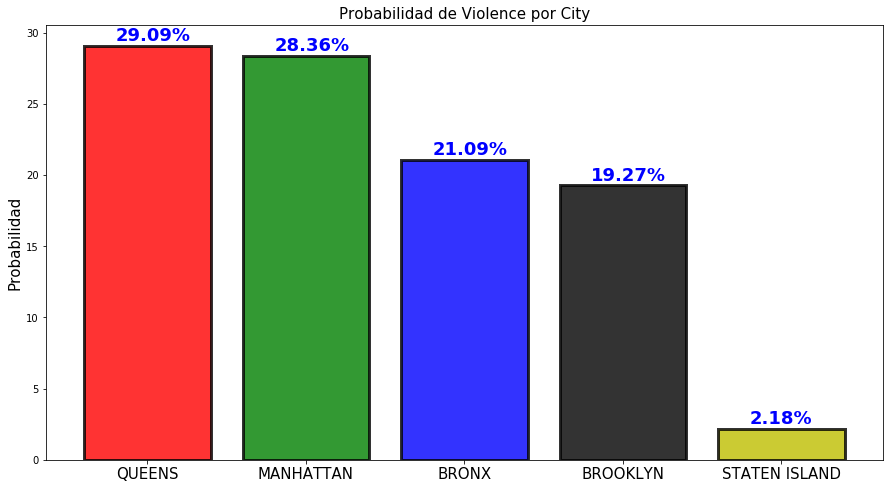

In [592]:
fig = plt.figure(figsize = (15,8))
my_colors = 'rgbky'
plt.bar(df_city_proba.city, df_city_proba.probabilidades, align='center', alpha=0.8,edgecolor='black',linewidth=3,color=my_colors)
plt.ylabel('Probabilidad',fontsize=15)
plt.title('Probabilidad de Violence por City',fontsize=15)
plt.xticks(fontsize=15)
for i, v in enumerate(df_city_proba.probabilidades):
    plt.text(i-0.2, v + .35, str(round(v,2))+"%", color='blue', fontweight='bold',fontsize=18)


### Análisis
   - ### A diferencia de lo que ocurría con `arstmade`, La tendencia de las probabilidades relacionadas a la `violence`, señala que en `QUENNS` el proceder policial es altamente violento.

In [593]:
def proba_condicion(df,var,tam):
    listado=df[var].unique().tolist()
    fig = plt.figure(figsize = (tam[0],tam[1]))
    #fig.suptitle('Probabilidades por Genero', fontsize=18)
    #fig.figsize = (15, 10)
    fig.subplots_adjust(hspace=0.2, wspace=-0.5,top = 1.9)
    i=0
    my_colors = 'rgbky'
    for i,n in enumerate(listado):
        plt.subplot(len(listado),1,i+1)
        df_city_sexo_prob=100*df[df[var]==n]["city"].value_counts('%')
        df_city_sexo_proba = df_city_sexo_prob.rename_axis('city').reset_index(name='probabilidades')
        plt.bar(df_city_sexo_proba['city'], df_city_sexo_proba['probabilidades'], align='center', alpha=0.8,edgecolor='black',linewidth=3,color=my_colors)
        
        plt.ylabel('Probabilidad',fontsize=15)
        plt.title('Probabilidad de Violence '+var+':'+(n),fontsize=18)
        plt.xticks(fontsize=15)
        for i, v in enumerate(df_city_sexo_proba.probabilidades):
            plt.text(i-0.2, v + .35, str(round(v,2))+"%", color='blue', fontweight='bold',fontsize=18)

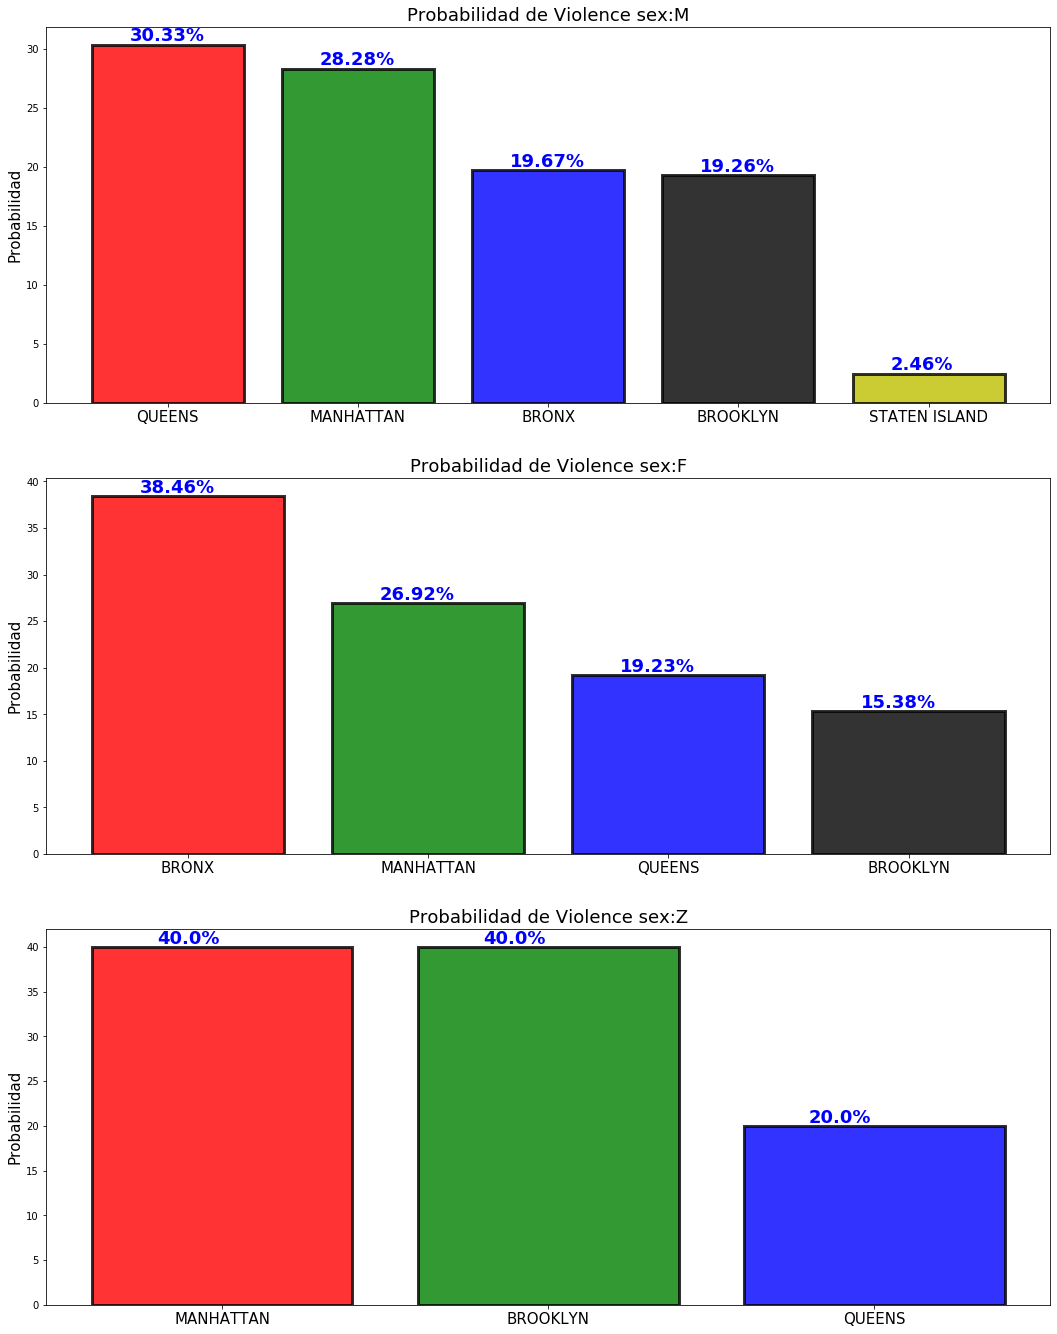

In [594]:
proba_condicion(proba,"sex",(18,10))

### Análisis
   - ### El actuar policial de tipo violento para los `M` (hombres) se da con mayor probabilidad en `QUENNS`
   - ### En `BRONX` hay mayor probabilidad de utilizar violencia sobre `F`(Mujer).
   - ### Para personas sin identificación de `sex`,se realizan procedimientos violentos en `MANHATTAN` y `BROOKLYN`

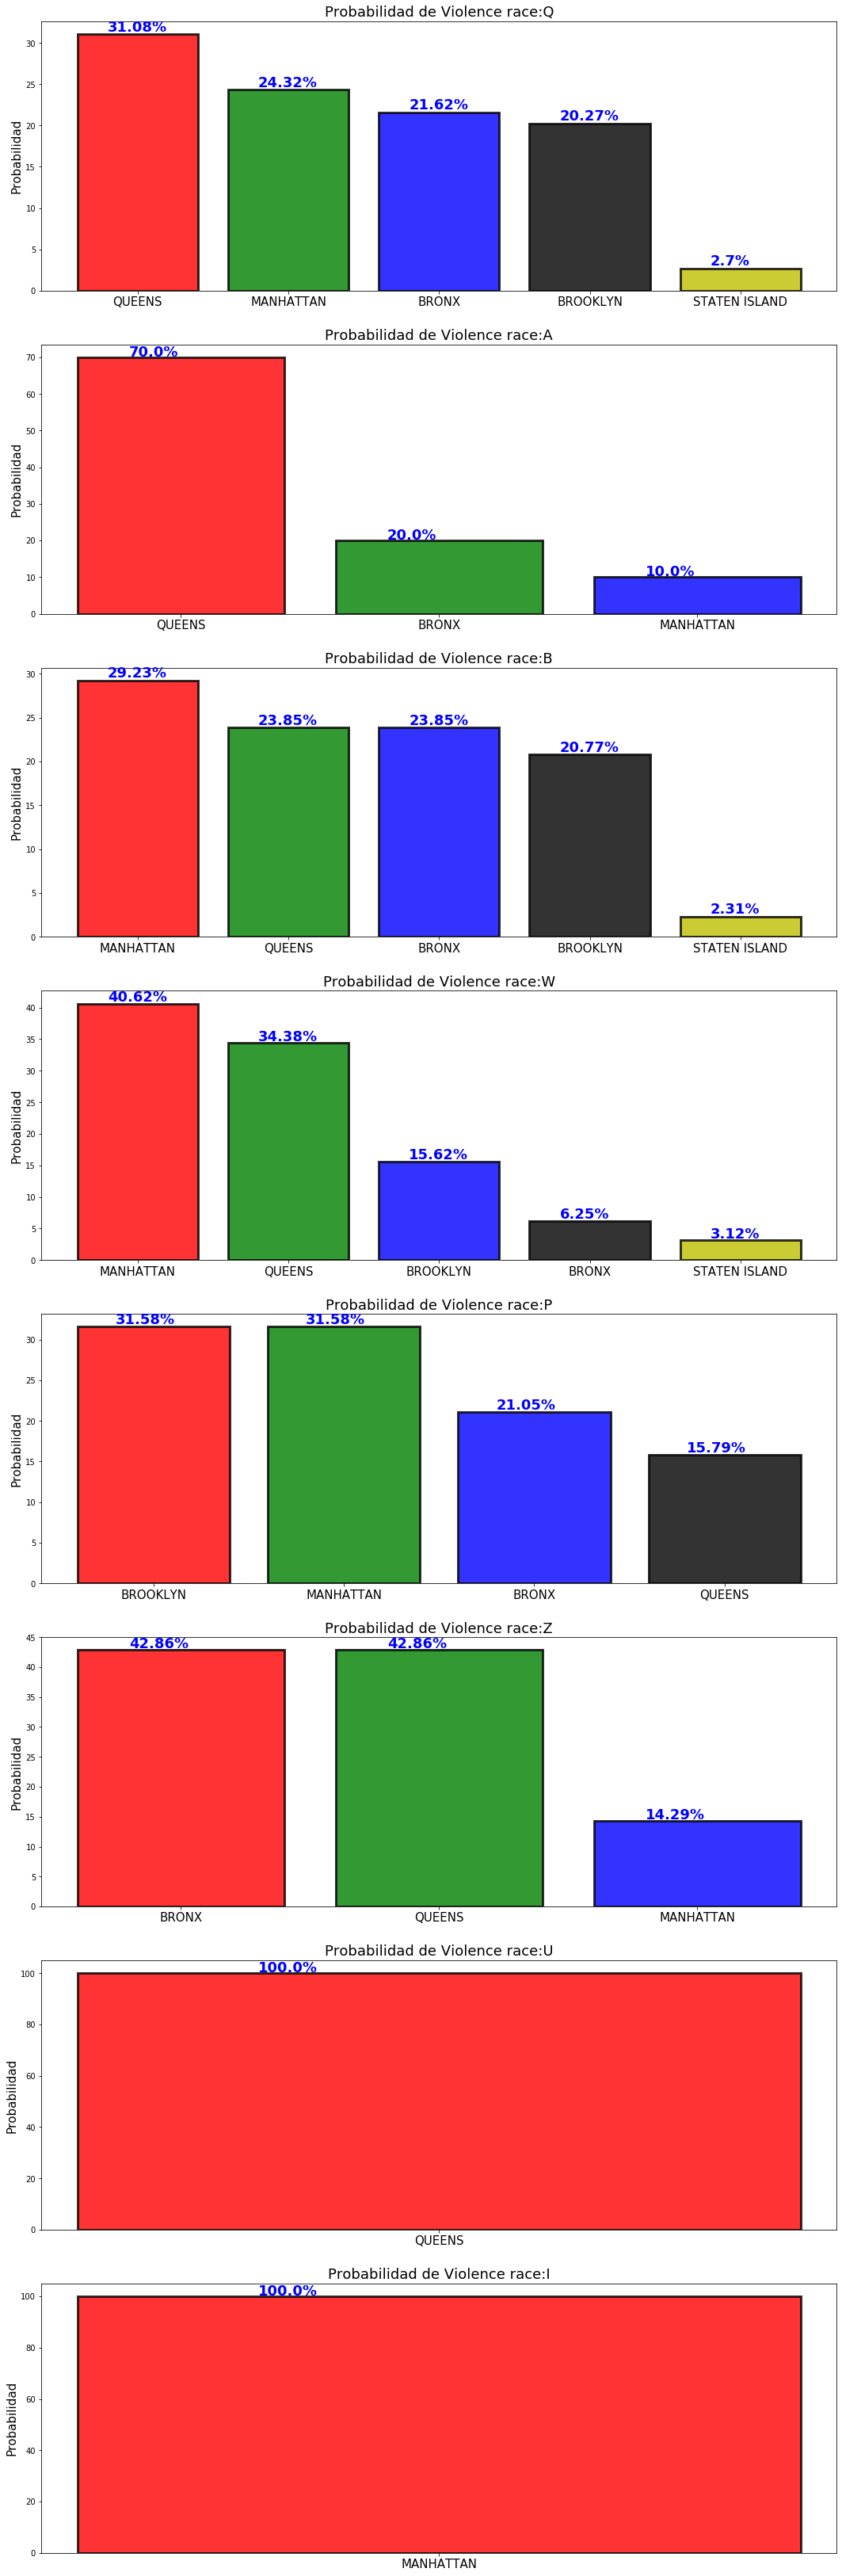

In [595]:
proba_condicion(proba,"race",(18,25))

### Análisis
   - ### En general, la mayoría de los tipos de razas, la tendencia probabilistica en un actuar violento se da en las ciudades de `MANHATTAN`, `QUENNS`.

### __Análisis General__
-  ### El modelo escogido `RF`, no logró diferenciar la probabilidad de razas que tenian una menor cantidad de datos, tanto para `arrestos` como para `violencia`, por ejemplo para razas `U` e `I`.
- ### Se hicieron modelos de predicción con uso de PCA, sin embargo, la precision de los modelos para la clase 1, fue bastante inferior, a cualquiera de los modelos mostrados en este trabajo y se consideró no mostrar en el proceso de este trabajo.
- ### Finalmente, luego de realizar 7 modelos de predicción, para el caso `arstmade`, el que más llama la atención fue de `LR` sin smote, ya que, muestra métricas para `classification report`, `matrix confusion` y `roc score` muy competitivas con modelos más exigentes en rendimiento y en consecuencia en tiempo, dejándo en evidencia, que modelos simples no deben descartarse en un proceso predictivo de clases binarias.